# Discriminative Classification
## Support Vector Machine
---

__This page can be downloaded as__ [interactive jupyter notebook](./SVM.ipynb)

---

In this notebook, we implement a support vector machine using the `scikit-learn` library. The principle of a support vector machine is to find support vectors, that define the separating surface in feature space between two classes. Usually a kernel is used to transform the feature space to a higher order. This enables more complex boundaries, since without this transformation only linear separation would be possible. SVMs are primary designed for binary classification meaning to distinguish between two classes. However a multi class classification is possible e.g. by one-vs-one or one-vs-many approaches. 


## Preparation
In order to implement the method, we import the required Python modules: 

In [3]:
import numpy as np                                   # Used for numerical computations
import matplotlib.pyplot as plt                      # Plotting library  
from sklearn.svm import SVC

# This is to set the size of the plots in the notebook
plt.rcParams['figure.figsize'] = [6, 6]    

### Creating a Toy Dataset
Next, we will create a toy dataset. It will contain samples which are drawn from 3 normal distributions, where each distribution represents a class. 

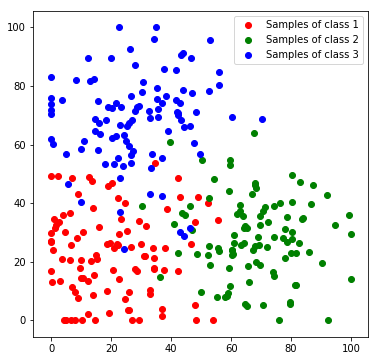

In [4]:
num_c = 3 # Number of clusters
colours = [[255, 170, 170], [170, 255, 170], [170, 170, 255]]

# Generate the samples (3 clusters), we set a fixed seed make the results reproducable
np.random.seed(0)
c1_samples = np.clip([(20, 20) + np.random.randn(2)*15 for i in range(100)], 0, 100)
c2_samples = np.clip([(70, 30) + np.random.randn(2)*15 for i in range(100)], 0, 100)
c3_samples = np.clip([(30, 70) + np.random.randn(2)*15 for i in range(100)], 0, 100)

# Plot the samples, colored by class
plt.scatter(*zip(*c1_samples), c='red', marker='o', label='Samples of class 1')
plt.scatter(*zip(*c2_samples), c='green', marker='o', label='Samples of class 2')
plt.scatter(*zip(*c3_samples), c='blue', marker='o', label='Samples of class 3')
plt.legend()
plt.show()

We stack all data samples to one matrix and append the class index as additional column. Each row in the resulting matrix contains one the x and y coordinates and the class index of one sample. 

In [5]:
c1_array = np.hstack((np.array(c1_samples), 1 * np.ones((len(c1_samples), 1))))
c2_array = np.hstack((np.array(c2_samples), 2 * np.ones((len(c2_samples), 1))))
c3_array = np.hstack((np.array(c3_samples), 3 * np.ones((len(c3_samples), 1))))

all_samples = np.vstack((c1_array, c2_array, c3_array))
print('Shape of stacked sample matrix:', all_samples.shape)

Shape of stacked sample matrix: (300, 3)


## Support Vector Machine

Next, the model is set up. Using the `scikit-learn` library, setting up the model and training it, requires only two lines of code:

In [50]:
# Generate the SVM classifier
svm = SVC()

# Train the classifier
svm.fit(all_samples[:,:2], all_samples[:,2])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Evaluation
For the evaluation we first classify each feature in the feature space to visualize the decision boundaries..

In [51]:
def predict_feature_space(model):
    label_map = np.zeros((100, 100, 3), dtype=np.ubyte)
    feature_space = []
    for x in range(100):
        for y in range(100):
            feature_space.append((x,y))
    feature_space = np.array(feature_space)
    labels = model.predict(feature_space)
    for x in range(100):
        for y in range(100):
            label = labels[x*100+y]
            label_map[y, x] = colours[int(label)-1]
    return label_map

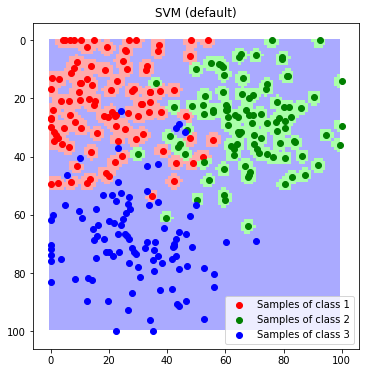

In [52]:
label_map = predict_feature_space(svm)

plt.imshow(label_map)
plt.scatter(*zip(*c1_samples), c='red', marker='o', label='Samples of class 1')
plt.scatter(*zip(*c2_samples), c='green', marker='o', label='Samples of class 2')
plt.scatter(*zip(*c3_samples), c='blue', marker='o', label='Samples of class 3')
plt.title('SVM (default)'); plt.legend(); plt.show()

We observe, that the default configuration of the `scikit learn` implementation is not suitable for our dataset and results in a strongly overfitted model. We therefore modify the Kernel-Coefficient $\gamma$ that controls the maximum complexity of the dicision boundaries. A lower coefficient leads to a stronger regularization.

In [56]:
# Generate the SVM classifier with stronger regularization
svm = SVC(gamma=0.01)

# Train the classifier
svm.fit(all_samples[:,:2], all_samples[:,2])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

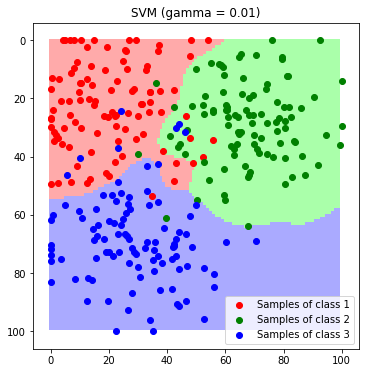

In [57]:
label_map = predict_feature_space(svm)

plt.imshow(label_map)
plt.scatter(*zip(*c1_samples), c='red', marker='o', label='Samples of class 1')
plt.scatter(*zip(*c2_samples), c='green', marker='o', label='Samples of class 2')
plt.scatter(*zip(*c3_samples), c='blue', marker='o', label='Samples of class 3')
plt.title('SVM (gamma = 0.01)'); plt.legend(); plt.show()

Now the decision boundaries look more reasonable. Tuning The Kernel-Coefficient is a crucial for a good classification model. Usually this is done by evaluating a grid search with cross validation.

## Discussion
Before Neural Networks became popular, SVMs were state of the art in many disciplines. This is due to the fact, that they are capable of modeling very complex mappings. Usually the training is slower than e.g. training a random forest, but the classification is very fast, since only the support vectors need to be considered. In contrast to probabilistic classifiers like the logistic regression it is not directly possible to predict class probabilities, however it is possible by using indirect methods. We saw, that setting up a support vector machine requires only a few lines of code when we use the `scikit-learn` implementation. 

Following code-cell removes `In[]` / `Out[]` prompts left to code cells.

In [77]:
%%HTML
<style>div.prompt {display:none}</style>

---

<table>
  <tr>
    <td>Author:</td>
    <td>Dennis Wittich</td>
  </tr>
  <tr>
    <td>Last modified:</td>
    <td>09 / 05 / 2019</td>
  </tr>
</table> 